## Import libraries

In [1]:
import gc
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow_addons.optimizers import AdamW, Lookahead
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.layers import Activation, Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate, Flatten
from tensorflow.keras.layers import Add, Reshape, Conv1D

## Prepare data

In [2]:
with open("../input/tps-may-data-preprocess/TPS_May_Dataset_w_Quantile.txt", 'rb') as handle: 
    data = handle.read()

processed_data = pickle.loads(data)
train_df = processed_data['train_df']

del processed_data
gc.collect()

0

In [3]:
ds = np.load('../input/tps-may-lgb-model/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb1, oof_score_lgb1, y_pred_final_lgb1 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/tps-may-xgb-model/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb1, oof_score_xgb1, y_pred_final_xgb1 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/tps-may-cb-model/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb1, oof_score_cb1, y_pred_final_cb1 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-cb-model-v2/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb11, oof_score_cb11, y_pred_final_cb11 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-lama-model/LAMA_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lama1, oof_score_lama1, y_pred_final_lama1 = ds['y_pred_meta_lama'], ds['oof_score'], ds['y_pred_final_lama']

ds = np.load('../input/tps-may-lgb-model-v3/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb3, oof_score_lgb3, y_pred_final_lgb3 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/tps-may-xgb-model-v3/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb3, oof_score_xgb3, y_pred_final_xgb3 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/tps-may-cb-model-v3/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb3, oof_score_cb3, y_pred_final_cb3 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-lama-model-v3/LAMA_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lama3, oof_score_lama3, y_pred_final_lama3 = ds['y_pred_meta_lama'], ds['oof_score'], ds['y_pred_final_lama']

ds = np.load('../input/tps-may-lgb-model-v1-1/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb2, oof_score_lgb2, y_pred_final_lgb2 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/tps-may-lgb-model-v1-2/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb21, oof_score_lgb21, y_pred_final_lgb21 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/tps-may-xgb-model-v1-1/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb2, oof_score_xgb2, y_pred_final_xgb2 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/tps-may-xgb-model-v1-2/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb21, oof_score_xgb21, y_pred_final_xgb21 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/tps-may-cb-model-v1-1/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb2, oof_score_cb2, y_pred_final_cb2 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-cb-model-v1-2/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb21, oof_score_cb21, y_pred_final_cb21 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-lama-model-v1-1/LAMA_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lama2, oof_score_lama2, y_pred_final_lama2 = ds['y_pred_meta_lama'], ds['oof_score'], ds['y_pred_final_lama']

ds = np.load('../input/tps-may-lgb-model-v4/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb4, oof_score_lgb4, y_pred_final_lgb4 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/tps-may-lgb-model-v4-1/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb41, oof_score_lgb41, y_pred_final_lgb41 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/tps-may-xgb-model-v4/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb4, oof_score_xgb4, y_pred_final_xgb4 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/tps-may-cb-model-v4/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb4, oof_score_cb4, y_pred_final_cb4 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-cb-model-v4-1/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb41, oof_score_cb41, y_pred_final_cb41 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-lama-model-v4/LAMA_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lama4, oof_score_lama4, y_pred_final_lama4 = ds['y_pred_meta_lama'], ds['oof_score'], ds['y_pred_final_lama']

ds = np.load('../input/tps-may-lgb-model-v0/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb0, oof_score_lgb0, y_pred_final_lgb0 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/tps-may-xgb-model-v0/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb0, oof_score_xgb0, y_pred_final_xgb0 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/tps-may-cb-model-v0/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb0, oof_score_cb0, y_pred_final_cb0 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-lama-model-v0/LAMA_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lama0, oof_score_lama0, y_pred_final_lama0 = ds['y_pred_meta_lama'], ds['oof_score'], ds['y_pred_final_lama']

ds = np.load('../input/tps-may-lgb-model-v5/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb5, oof_score_lgb5, y_pred_final_lgb5 = ds['y_pred_meta_lgb'], ds['oof_score'], ds['y_pred_final_lgb']

ds = np.load('../input/tps-may-xgb-model-v5/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb5, oof_score_xgb5, y_pred_final_xgb5 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/tps-may-xgb-model-v5-1/XGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_xgb51, oof_score_xgb51, y_pred_final_xgb51 = ds['y_pred_meta_xgb'], ds['oof_score'], ds['y_pred_final_xgb']

ds = np.load('../input/tps-may-cb-model-v5/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb5, oof_score_cb5, y_pred_final_cb5 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-cb-model-v5-1/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb51, oof_score_cb51, y_pred_final_cb51 = ds['y_pred_meta_cb'], ds['oof_score'], ds['y_pred_final_cb']

ds = np.load('../input/tps-may-lama-model-v5/LAMA_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lama5, oof_score_lama5, y_pred_final_lama5 = ds['y_pred_meta_lama'], ds['oof_score'], ds['y_pred_final_lama']

In [4]:
Xtrain_meta = np.concatenate((y_pred_meta_cb11, y_pred_meta_lgb1, y_pred_meta_lama1, y_pred_meta_xgb1, 
                              y_pred_meta_cb21, y_pred_meta_lgb21, y_pred_meta_lama2, y_pred_meta_xgb21, 
                              y_pred_meta_cb3, y_pred_meta_lama3, y_pred_meta_lgb3, y_pred_meta_xgb3, 
                              y_pred_meta_cb41, y_pred_meta_lgb41, y_pred_meta_lama4, y_pred_meta_xgb4, 
                              y_pred_meta_cb0, y_pred_meta_lgb0, y_pred_meta_lama0, y_pred_meta_xgb0, 
                              y_pred_meta_cb51, y_pred_meta_lgb5, y_pred_meta_lama5, y_pred_meta_xgb51
                             ), axis=1)

Xtest_meta = np.concatenate((y_pred_final_cb11, y_pred_final_lgb1, y_pred_final_lama1, y_pred_final_xgb1, 
                             y_pred_final_cb21, y_pred_final_lgb21, y_pred_final_lama2, y_pred_final_xgb21, 
                             y_pred_final_cb3, y_pred_final_lama3, y_pred_final_lgb3, y_pred_final_xgb3, 
                             y_pred_final_cb41, y_pred_final_lgb41, y_pred_final_lama4, y_pred_final_xgb4, 
                             y_pred_final_cb0, y_pred_final_lgb0, y_pred_final_lama0, y_pred_final_xgb0, 
                             y_pred_final_cb51, y_pred_final_lgb5, y_pred_final_lama5, y_pred_final_xgb51
                            ), axis=1)

Ytrain_meta = train_df['target'].values
Ytrain_oh = pd.get_dummies(train_df['target']).values

print("Xtrain_meta shape: {}".format(Xtrain_meta.shape))
print("Ytrain_meta shape: {}".format(Ytrain_meta.shape))
print("Xtest_meta shape: {}".format(Xtest_meta.shape))

Xtrain_meta shape: (99918, 96)
Ytrain_meta shape: (99918,)
Xtest_meta shape: (50000, 96)


## Base Models Performance

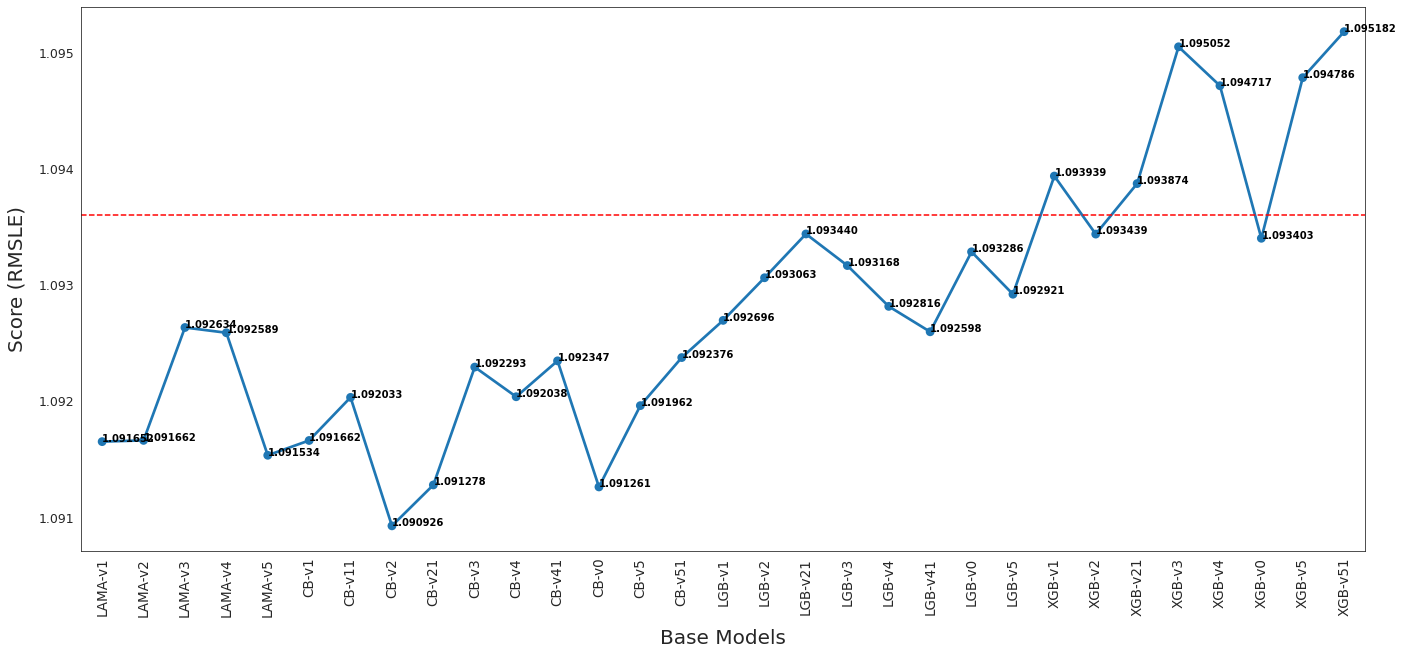

In [5]:
scores={
    'LAMA-v1': float(oof_score_lama1),
    'LAMA-v2': float(oof_score_lama2),
    'LAMA-v3': float(oof_score_lama3),
    'LAMA-v4': float(oof_score_lama4),
    #'LAMA-v0': float(oof_score_lama0),
    'LAMA-v5': float(oof_score_lama5),
    'CB-v1': float(oof_score_cb1),
    'CB-v11': float(oof_score_cb11),
    'CB-v2': float(oof_score_cb2),
    'CB-v21': float(oof_score_cb21),
    'CB-v3': float(oof_score_cb3),
    'CB-v4': float(oof_score_cb4),
    'CB-v41': float(oof_score_cb41),
    'CB-v0': float(oof_score_cb0),
    'CB-v5': float(oof_score_cb5),
    'CB-v51': float(oof_score_cb51),
    'LGB-v1': float(oof_score_lgb1),
    'LGB-v2': float(oof_score_lgb2),
    'LGB-v21': float(oof_score_lgb21),
    'LGB-v3': float(oof_score_lgb3),
    'LGB-v4': float(oof_score_lgb4),
    'LGB-v41': float(oof_score_lgb41),
    'LGB-v0': float(oof_score_lgb0),
    'LGB-v5': float(oof_score_lgb5),
    'XGB-v1': float(oof_score_xgb1),
    'XGB-v2': float(oof_score_xgb2),
    'XGB-v21': float(oof_score_xgb21),
    'XGB-v3': float(oof_score_xgb3),
    'XGB-v4': float(oof_score_xgb4),
    'XGB-v0': float(oof_score_xgb0),
    'XGB-v5': float(oof_score_xgb5),
    'XGB-v51': float(oof_score_xgb51)
}

sns.set_style("white")
fig = plt.figure(figsize=(23, 10))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score in list(scores.values())], markers=['o'], linestyles=['-'])
for i, score in enumerate(list(scores.values())):
    ax.text(i, score, '{:.6f}'.format(score), horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.ylabel('Score (RMSLE)', size=20, labelpad=12.5)
plt.xlabel('Base Models', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5, rotation=90)
plt.tick_params(axis='y', labelsize=12.5)
plt.axhline(y=1.0936, color='r', linestyle='--')
plt.show()

## Build the model

In [6]:
def cnn_model(n_features):
    
    x_input = Input(shape=(n_features, ))

    x1 = Dense(units=128, kernel_initializer='he_uniform', 
               kernel_regularizer=l2(0.0003))(x_input)
    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x1 = Dropout(rate=0.5)(x1)
    
    x = Reshape((8, 16))(x1)
    
    x = Conv1D(filters=32, kernel_size=3, 
               strides=2, padding='same', 
               kernel_regularizer=l2(0.0009),
               kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv1D(filters=64, kernel_size=1, 
               strides=1, padding='same', 
               kernel_regularizer=l2(0.0009),
               kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv1D(filters=64, kernel_size=3, 
               strides=2, padding='same', 
               kernel_regularizer=l2(0.0009),
               kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Flatten()(x)
    x = Add()([x, x1])
    x = BatchNormalization()(x)
    
    x = Dense(units=64, kernel_initializer='he_uniform', 
                kernel_regularizer=l2(0.0003))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(rate=0.35)(x)
    
    x = Dense(units=4, activation='softmax', 
              kernel_initializer='he_uniform')(x)

    model = Model(inputs=x_input, outputs=x, name='CNN_Blend_Model')
    return model

In [7]:
model = cnn_model(Xtrain_meta.shape[1])

model.compile(loss='categorical_crossentropy',
              optimizer=Lookahead(AdamW(lr=1e-2, 
                                        weight_decay=1e-5, 
                                        clipvalue=700), 
                                  sync_period=10))

model.summary()

Model: "CNN_Blend_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          12416       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128)          512         dense[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 128)          0           batch_normalization[0][0]        
____________________________________________________________________________________

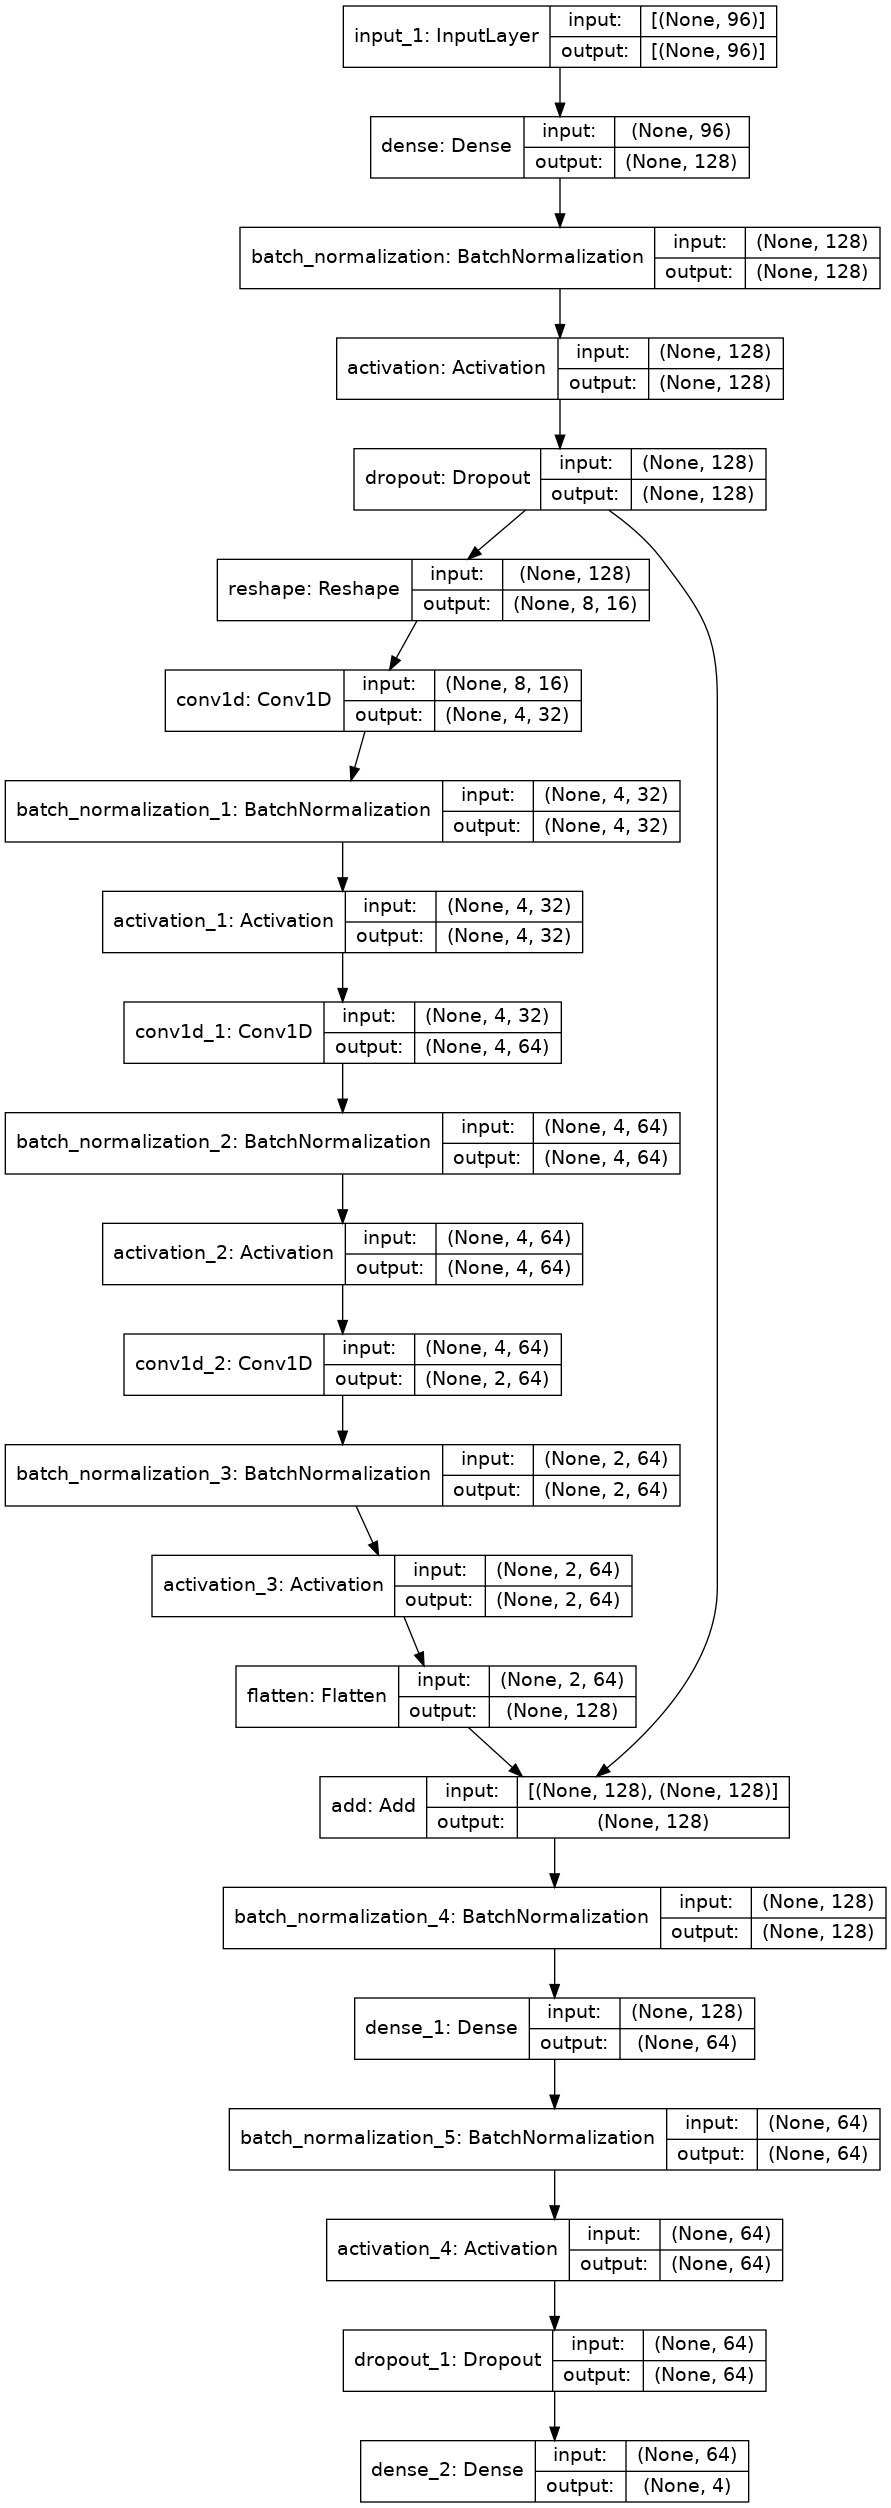

In [8]:
plot_model(
    model, to_file='./CNN_Blend_model.png', 
    show_shapes=True, show_layer_names=True
)

In [9]:
FOLD = 10
NUM_SEED = 2
VERBOSE = 0

# Prediction Clipping Thresholds
p_min = 0.025
p_max = 1 - p_min

np.random.seed(3)
seeds = np.random.randint(0, 100, size=NUM_SEED)

oof_score = 0
y_pred_meta_dnn = np.zeros((Ytrain_meta.shape[0], 4))
y_pred_final_dnn = np.zeros((Xtest_meta.shape[0], 4))
counter = 0
mini_batch_size = 128


for sidx, seed in enumerate(seeds):
    seed_score = 0
    
    kfold = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=seed)

    for idx, (train, val) in enumerate(kfold.split(Xtrain_meta, Ytrain_meta)):
        counter += 1

        train_x, train_y, train_y_oh = Xtrain_meta[train], Ytrain_meta[train], Ytrain_oh[train]
        val_x, val_y, val_y_oh = Xtrain_meta[val], Ytrain_meta[val], Ytrain_oh[val]

        model = cnn_model(Xtrain_meta.shape[1])
        
        model.compile(loss='categorical_crossentropy',
                      optimizer=Lookahead(AdamW(lr=1e-2, 
                                                weight_decay=1e-5, 
                                                clipvalue=700), 
                                          sync_period=10))

        early = EarlyStopping(monitor="val_loss", mode="min", 
                              restore_best_weights=True, 
                              patience=10, verbose=VERBOSE)

        reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, 
                                      min_lr=1e-6, patience=5, 
                                      verbose=VERBOSE, mode='min')

        chk_point = ModelCheckpoint('./DNN_model.h5', 
                                    monitor='val_loss', verbose=VERBOSE, 
                                    save_best_only=True, mode='min')
        
        history = model.fit(
            train_x, train_y_oh, 
            batch_size=mini_batch_size,
            epochs=150, 
            verbose=VERBOSE, 
            workers=5,
            callbacks=[reduce_lr, early, chk_point], 
            validation_data=(val_x, val_y_oh)
        )
        
        model = load_model('./DNN_model.h5')

        y_pred = model.predict(val_x)
        y_pred = np.clip(y_pred, p_min, p_max)
        y_pred_meta_dnn[val] += y_pred
        y_pred_final_dnn += model.predict(Xtest_meta)
        
        score = log_loss(val_y_oh, y_pred)
        oof_score += score
        seed_score += score
        print("Seed-{} | Fold-{} | OOF Score: {}".format(seed, idx, score))
    
    print("\nSeed: {} | Aggregate OOF Score: {}\n\n".format(seed, (seed_score / FOLD)))


y_pred_meta_dnn = y_pred_meta_dnn / float(NUM_SEED)
y_pred_final_dnn = y_pred_final_dnn / float(counter)
oof_score /= float(counter)
print("Aggregate OOF Score: {}".format(oof_score))

Seed-24 | Fold-0 | OOF Score: 1.086271212917206
Seed-24 | Fold-1 | OOF Score: 1.0856629518077696
Seed-24 | Fold-2 | OOF Score: 1.0898547023519862
Seed-24 | Fold-3 | OOF Score: 1.083923526889711
Seed-24 | Fold-4 | OOF Score: 1.087366690696646
Seed-24 | Fold-5 | OOF Score: 1.0874541264752133
Seed-24 | Fold-6 | OOF Score: 1.0859622210830904
Seed-24 | Fold-7 | OOF Score: 1.087468718666974
Seed-24 | Fold-8 | OOF Score: 1.0843414796903892
Seed-24 | Fold-9 | OOF Score: 1.0894128256401445

Seed: 24 | Aggregate OOF Score: 1.086771845621913


Seed-3 | Fold-0 | OOF Score: 1.0850360864777866
Seed-3 | Fold-1 | OOF Score: 1.085697832780542
Seed-3 | Fold-2 | OOF Score: 1.0869300838193003
Seed-3 | Fold-3 | OOF Score: 1.0893147365943945
Seed-3 | Fold-4 | OOF Score: 1.0861878515071302
Seed-3 | Fold-5 | OOF Score: 1.0886259792034056
Seed-3 | Fold-6 | OOF Score: 1.0852794338650018
Seed-3 | Fold-7 | OOF Score: 1.0863296494553025
Seed-3 | Fold-8 | OOF Score: 1.0849688975627974
Seed-3 | Fold-9 | OOF Score: 1

In [10]:
np.savez_compressed('./CNN_Meta_Features.npz',
                    y_pred_meta_dnn=y_pred_meta_dnn, 
                    oof_score=oof_score,
                    y_pred_final_dnn=y_pred_final_dnn)

## Create submission file

In [11]:
y_pred_final_dnn = np.clip(y_pred_final_dnn, p_min, p_max)

test_df = pd.read_csv("../input/tabular-playground-series-may-2021/test.csv")
submit_df = pd.DataFrame()
submit_df['id'] = test_df['id']
submit_df['Class_1'] = y_pred_final_dnn[:,0]
submit_df['Class_2'] = y_pred_final_dnn[:,1]
submit_df['Class_3'] = y_pred_final_dnn[:,2]
submit_df['Class_4'] = y_pred_final_dnn[:,3]
submit_df.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.087528,0.628222,0.172825,0.111425
1,100001,0.086996,0.680840,0.142970,0.089194
2,100002,0.087607,0.661679,0.155948,0.094766
3,100003,0.092283,0.526254,0.278830,0.102634
4,100004,0.087591,0.641451,0.165240,0.105718


In [12]:
submit_df.to_csv("./CNN_Blend_submission.csv", index=False)